In [1]:
# import library
import numpy as np # linear algebra
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import plotly
import streamlit

In [2]:
print('joblib: '+joblib.__version__)
print('matplotlib :'+matplotlib.__version__)
print('numpy: '+np.__version__)
print('pandas :'+pd.__version__)
print('plotly :'+pd.__version__)
print('sklearn: '+sklearn.__version__)
print('seaborn :'+sns.__version__)
print('streamlit :'+streamlit.__version__)

joblib: 1.1.1
matplotlib :3.9.0
numpy: 1.23.2
pandas :2.2.2
plotly :2.2.2
sklearn: 1.2.2
seaborn :0.13.2
streamlit :1.34.0


In [7]:
# !pip install joblib

# EDA

In [3]:
#load data
df_titanic = pd.read_csv('titanic.csv')

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Descriptive

In [5]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_titanic.shape

(891, 12)

In [7]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Visualization

### pie chart

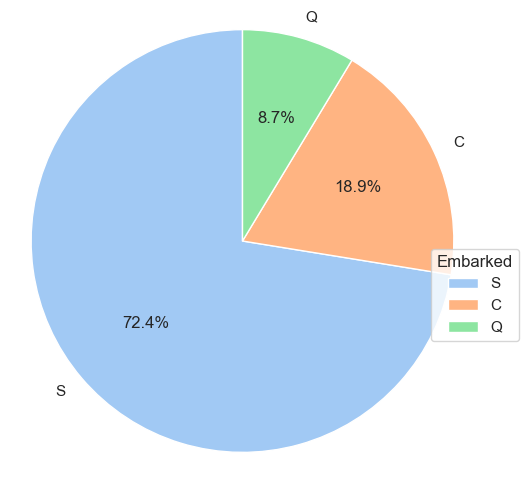

In [9]:
embarked_counts = df_titanic['Embarked'].value_counts()
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.legend(title='Embarked', loc='upper center' ,bbox_to_anchor=(1, 0.5))
plt.show()

### violin

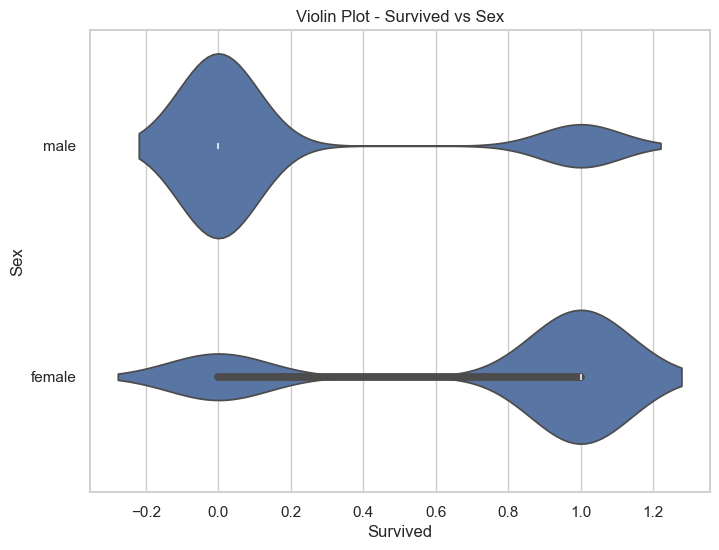

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset Titanic dari seaborn
titanic_data = sns.load_dataset('titanic')

# Membuat chart violin
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_titanic, x='Survived', y='Sex')
plt.title('Violin Plot - Survived vs Sex')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()


### null detection

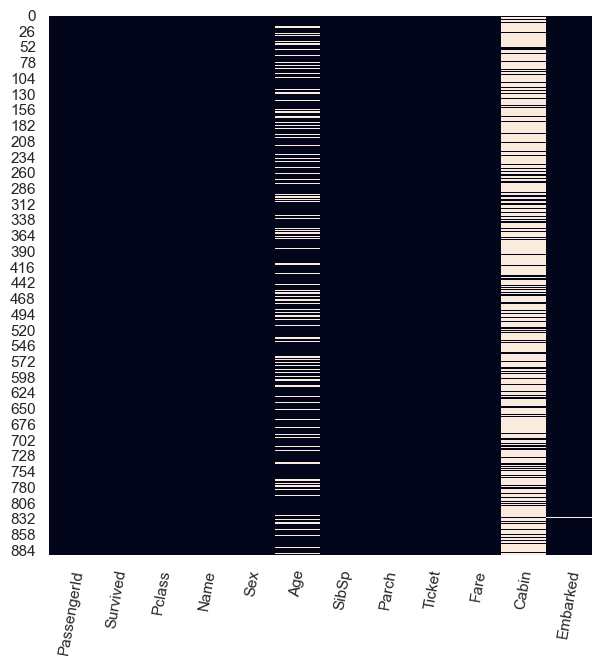

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df_titanic.isnull(), cbar=False)
plt.xticks(rotation=80)
plt.show(fig)

# Modelling

In [12]:
#load data clear
df_clear=pd.read_csv('df_titanic_clear.csv')

In [13]:
df_clear.head()

,Survived,Pclass,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,0,3,7.2500,0,2,1,0,0,0,0,1,0,0,0
1,1,1,71.2833,1,0,0,1,0,0,0,0,1,0,0
2,1,3,7.9250,1,2,0,0,1,0,0,1,0,0,0
3,1,1,53.1000,1,2,0,1,0,0,0,0,1,0,0
4,0,3,8.0500,0,2,1,0,0,0,0,0,1,0,0


In [19]:
# Survived : 0 : dead, 1 : alive
# Pclass : 1 , 2 , 3
# sex_enc : 0 :male, 1:female
# Embarked  0:C, 1:Q , 2:S
# Mr, Mrs, Miss, Other 
#                 'Mlle': 'Miss',
#                  'Mme': 'Miss',
#                  'Ms': 'Miss',
#                  'Dr': 'Mr',
#                  'Major': 'Mr',
#                  'Lady': 'Mrs',
#                  'Countess': 'Mrs',
#                  'Jonkheer': 'Other',
#                  'Col': 'Other',
#                  'Rev': 'Other',
#                  'Capt': 'Mr',
#                  'Sir': 'Mr',
#                  'Don': 'Mr'
                    
# child  : 0-15
# young_adult: 16-30
# adult : 31 -50
# ederly :51-100




## train test split

In [14]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan label dari data Anda
X = df_clear.drop('Survived', axis=1)
y = df_clear['Survived']
# Memisahkan data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## create model

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)



RandomForestClassifier()

In [16]:
feature_importances = model.feature_importances_
fitur=[]
nilai=[]
for feature, importance in zip(X.columns, feature_importances):
    fitur.append(feature)
    nilai.append(importance)
feature_importan= pd.DataFrame({'Fiture':fitur, 'Nilai':nilai})
feature_importan.sort_values(by='Nilai', ascending=False)

,Fiture,Nilai
1,Fare_dbscan,0.412033
4,Mr,0.171157
2,Sex_enc,0.118759
0,Pclass,0.114624
3,Embarked_enc,0.044238
6,Miss,0.038291
5,Mrs,0.035037
10,adult,0.014133
9,young_adult,0.013410
12,child,0.012253


## hyper parameter tuning

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [5,10,50],
               'max_depth': [5,10,20],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [2,5,10],
               'bootstrap': [False],
                'criterion': ['gini']}
gs = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=1, n_jobs=-1)
gs.fit(X, y)
print(gs.best_estimator_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50)


## accuracy

In [18]:
predictions = gs.best_estimator_.predict(X_test)

In [19]:
actual=y_test

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

conf_matrix = confusion_matrix(actual, predictions)

print(conf_matrix)
print('Accuracy score:', round(accuracy_score(actual, predictions),2))
print('Recall score:', round(recall_score(actual, predictions),2))
print('Precision score:', round(precision_score(actual, predictions),2))
print('F1 score:', round(f1_score(actual, predictions),2))

[[94 11]
 [13 61]]
Accuracy score: 0.87
Recall score: 0.82
Precision score: 0.85
F1 score: 0.84


## export model

In [21]:
model_rf= RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50)

In [22]:
model_rf.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=50)

In [23]:
joblib.dump(model_rf, 'model.joblib')

['model.joblib']

## import model

In [24]:
model_loaded = joblib.load('model.joblib')

In [25]:
X[:1]

,Pclass,Fare_dbscan,Sex_enc,Embarked_enc,Mr,Mrs,Miss,Master,Other,young_adult,adult,elderly,child
0,3,7.25,0,2,1,0,0,0,0,1,0,0,0


In [26]:
y_predict = model_loaded.predict(X[1:2])
y_predict

array([1], dtype=int64)

## Probability

In [27]:
pred_prob = model_loaded.predict_proba(X[:1])

In [28]:
pred_prob

array([[0.94763767, 0.05236233]])

In [29]:
pred_prob[0][0]

0.9476376748740425